In [1]:
# Overview data

import pandas as pd

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/chm13/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove duplicate haplotypes
unique_haplotypes_df = df.drop_duplicates(subset=['Sample_Haplotype'])

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the unique haplotypes DataFrame on 'Sample' column
merged_df = pd.merge(unique_haplotypes_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Count the total number of unique haplotypes
total_haplotypes = len(merged_df['Sample_Haplotype'].unique())
print(f"Total number of unique haplotypes: {total_haplotypes}")

# Check and count the sex and superpopulation annotations
sex_counts = merged_df['Sex'].value_counts()
print("Sex counts:\n", sex_counts)

superpop_counts = merged_df['Superpopulation name'].value_counts()
print("Superpopulation counts:\n", superpop_counts)

# Identify samples with missing annotations
missing_sex = merged_df[merged_df['Sex'].isna()]['Sample']
missing_superpop = merged_df[merged_df['Superpopulation name'].isna()]['Sample']

print("Samples with missing Sex annotation:")
print(missing_sex)

print("\nSamples with missing Superpopulation annotation:")
print(missing_superpop)

# Group by 'Superpopulation name' and 'Sex', then count occurrences
haplotype_by_superpop = merged_df.groupby(['Superpopulation name', 'Sex']).size().unstack(fill_value=0)

# Display the resulting DataFrame
print("\nHaplotype by Superpopulation:\n", haplotype_by_superpop)


Total number of unique haplotypes: 130
Sex counts:
 Sex
female    68
male      58
Name: count, dtype: int64
Superpopulation counts:
 Superpopulation name
African Ancestry        58
East Asian Ancestry     20
American Ancestry       18
South Asian Ancestry    16
European Ancestry       14
Name: count, dtype: int64
Samples with missing Sex annotation:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Samples with missing Superpopulation annotation:
11    NA21487
28    NA21487
81    NA24385
87    NA24385
Name: Sample, dtype: object

Haplotype by Superpopulation:
 Sex                   female  male
Superpopulation name              
African Ancestry          28    30
American Ancestry         12     6
East Asian Ancestry       12     8
European Ancestry          6     8
South Asian Ancestry      10     6


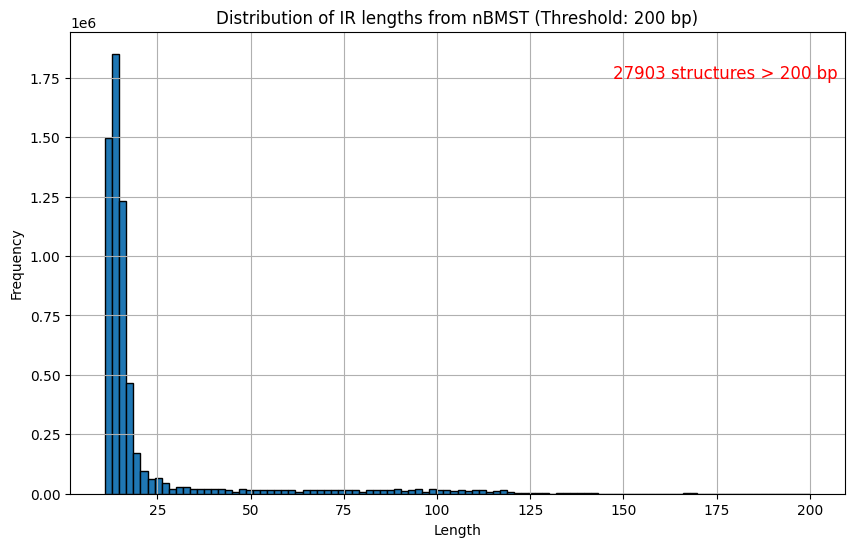

In [4]:
# Plot distribution of Inverted Repeat Lengths

import pandas as pd
import matplotlib.pyplot as plt

# Read the BED file into a pandas DataFrame
bed_file = '/home/alextu/scratch/results/bed_files/chm13_ref_genome/chm13v2.0_nonb_annotations_collapsed/IR/IR.collapsed.bed'
df = pd.read_csv(bed_file, sep='\t', header=None, names=['chrom', 'start', 'end'])

# Calculate the length of each entry
df['length'] = df['end'] - df['start']

# Define a length threshold
length_threshold = 200  # Example threshold, change as needed

# Filter out lengths longer than the threshold
filtered_df = df[df['length'] <= length_threshold]

# Count the number of structures past the threshold
structures_past_threshold = df[df['length'] > length_threshold].shape[0]

# Plot the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['length'], bins=100, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Distribution of IR lengths from nBMST (Threshold: {length_threshold} bp)')
plt.grid(True)

# Annotate the number of structures past the threshold
plt.annotate(f'{structures_past_threshold} structures > {length_threshold} bp', 
             xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Show the plot
plt.show()


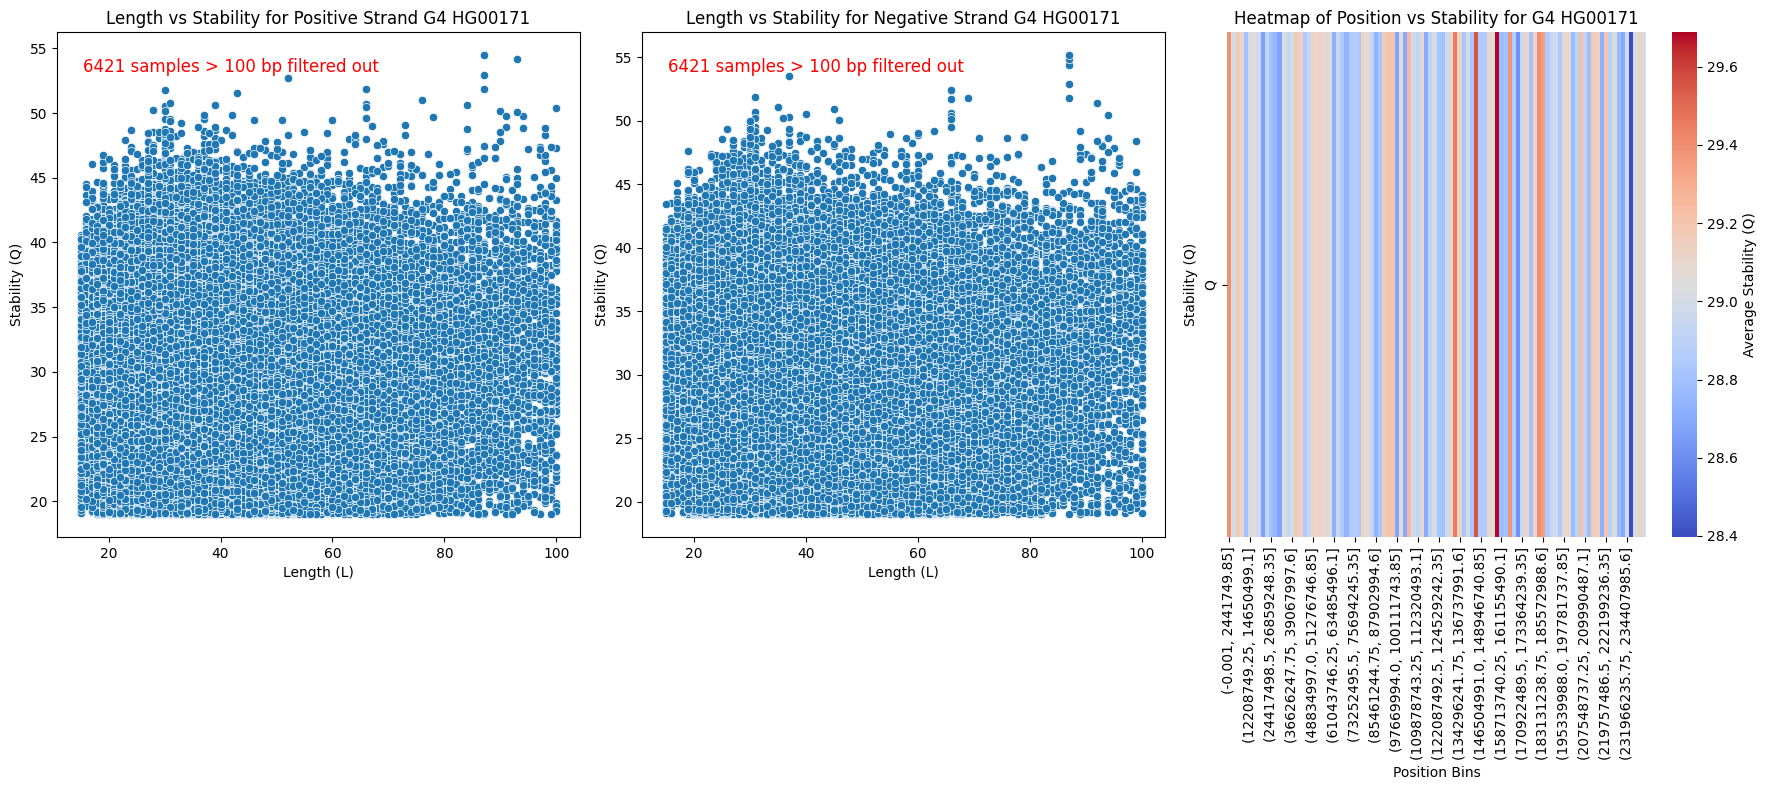

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file into a pandas DataFrame
csv_file = '/home/alextu/scratch/results/quadron_q19_filtered_csvs/20230818_verkko_batch1_assemblies_aligned_chm13_collapsed/HG00171_hap1_quadron_filtered_verkko_batch1.csv'
df = pd.read_csv(csv_file)

# Define length threshold
length_threshold = 100  # Adjust the threshold as needed

# Filter out motifs over the specified length
df_filtered = df[df['L'] <= length_threshold]

# Count the number of filtered samples
num_filtered_samples = df[df['L'] > length_threshold].shape[0]

# Filter the data based on STR values
df_positive = df_filtered[df_filtered['STR'] == '+']
df_negative = df_filtered[df_filtered['STR'] == '-']

# Plotting Length (L) versus Stability (Q) for positive STR values
plt.figure(figsize=(18, 8))

# Subplot 1: Length vs Stability for Positive Strand
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_positive, x='L', y='Q')
plt.xlabel('Length (L)')
plt.ylabel('Stability (Q)')
plt.title('Length vs Stability for Positive Strand G4 HG00171')
plt.annotate(f'{num_filtered_samples} samples > {length_threshold} bp filtered out', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', 
             verticalalignment='top')

# Subplot 2: Length vs Stability for Negative Strand
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_negative, x='L', y='Q')
plt.xlabel('Length (L)')
plt.ylabel('Stability (Q)')
plt.title('Length vs Stability for Negative Strand G4 HG00171')
plt.annotate(f'{num_filtered_samples} samples > {length_threshold} bp filtered out', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', 
             verticalalignment='top')

# Subplot 3: Heatmap for Position vs Stability
plt.subplot(1, 3, 3)

# Define the number of bins for the heatmap, starting from 0
bins = 100  # Increase the number of bins for finer resolution

# Use .loc to avoid the SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Create bins starting from 0, with a range that fits the Pos column
df_filtered['Pos_bin'] = pd.cut(df_filtered['Pos'], bins=np.linspace(0, df_filtered['Pos'].max(), bins + 1), include_lowest=True)

# Group data and calculate the mean position and stability for each bin
heatmap_data = df_filtered.groupby('Pos_bin', observed=False).agg({'Pos': 'mean', 'Q': 'mean'}).reset_index()

# Create the heatmap data pivot
heatmap_data_pivot = heatmap_data.pivot_table(index='Pos_bin', values='Q', observed=False)

# Use sns.heatmap for visualizing Position vs Stability
sns.heatmap(heatmap_data_pivot.T, cmap='coolwarm', cbar_kws={'label': 'Average Stability (Q)'})

plt.xlabel('Position Bins')
plt.ylabel('Stability (Q)')
plt.title('Heatmap of Position vs Stability for G4 HG00171')

plt.tight_layout()
plt.show()

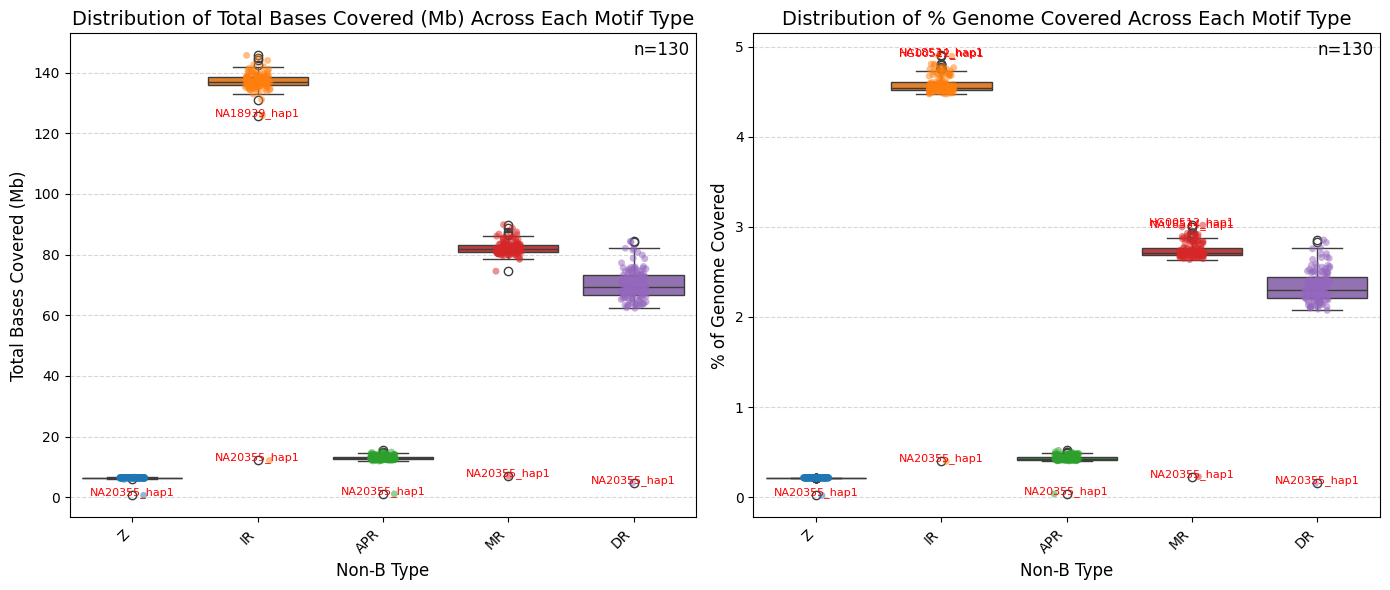

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Convert Total Bases Covered to megabases (Mb)
df['Total Bases Covered (Mb)'] = df['Total Bases Covered'] / 1_000_000

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Function to identify extreme outliers
def identify_extreme_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Get unique number of sample_haplotypes
unique_sample_haplotypes = merged_df['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a boxplot using seaborn
sns.boxplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Total Bases Covered (Mb)'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a boxplot using seaborn
sns.boxplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
for motif_type in merged_df['Motif Type'].unique():
    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
    outliers = identify_extreme_outliers(motif_data['Percent of Genome'])
    for i in outliers.index:
        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
        plt.text(x=motif_type, y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, y=merged_df['Percent of Genome'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


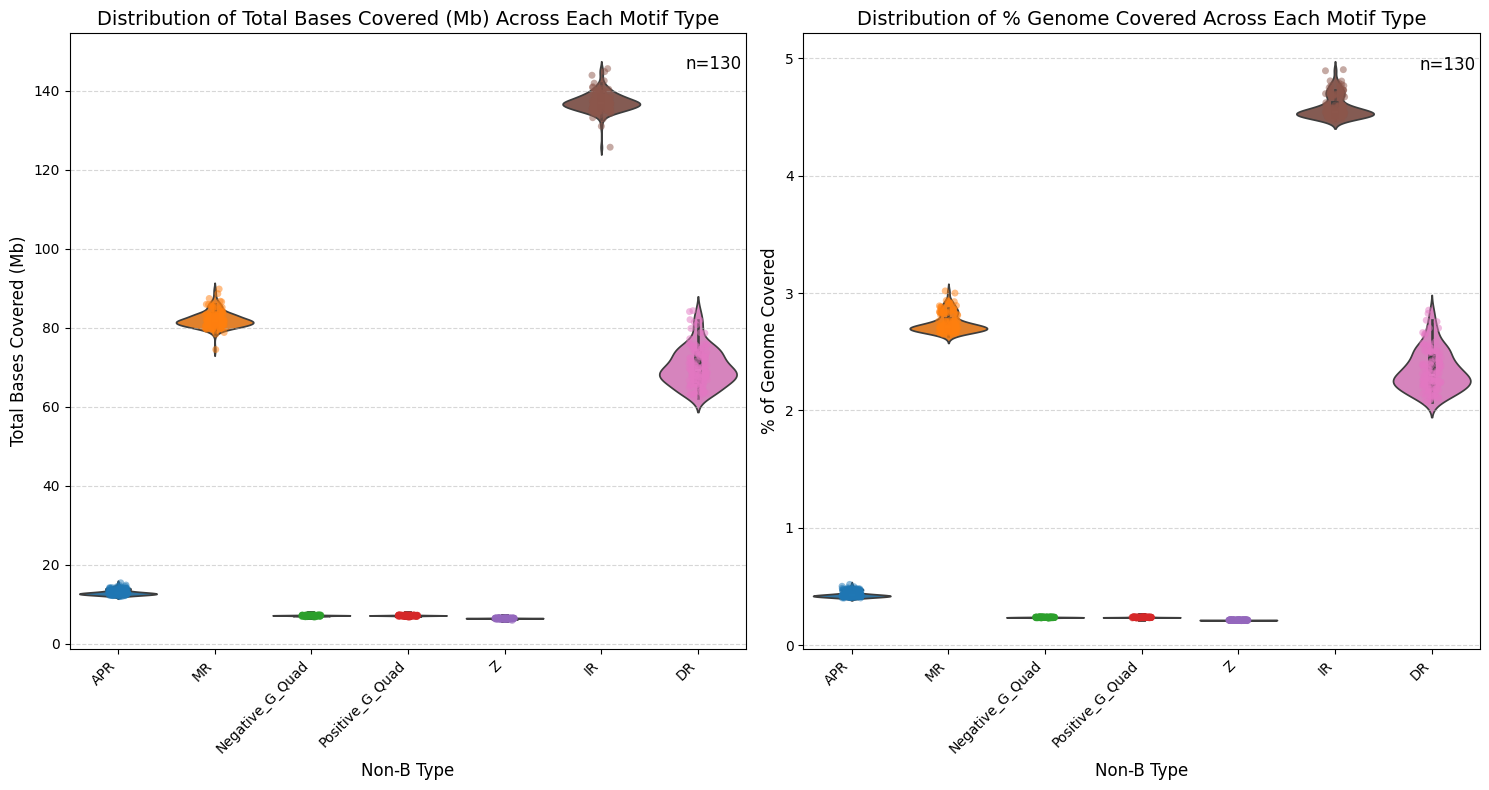

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load your feature counts dataframes for batches 1-3
batch1 = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/verkko_batch3_chm13_collapsed_summary_metrics.csv')

# Combine the dataframes for batches 1-3
df = pd.concat([batch1, batch2, batch3], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Convert Total Bases Covered to megabases (Mb)
df['Total Bases Covered (Mb)'] = df['Total Bases Covered'] / 1_000_000

# Load your feature counts dataframe for batch 4 (Quadron G4s)
batch4 = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Extract sample identifier and haplotype from 'Sample_Haplotype' column for batch 4
batch4[['Sample', 'Haplotype']] = batch4['Sample_Haplotype'].str.split('_', expand=True)

# Convert Total Bases Covered to megabases (Mb) for batch 4
batch4['Total Bases Covered (Mb)'] = batch4['Total Bases Covered'] / 1_000_000

# Combine all batches (1-4)
df_combined = pd.concat([df, batch4], ignore_index=True)

# Sort by 'Sample_Haplotype'
df_combined = df_combined.sort_values(by='Sample_Haplotype')

# Load the metadata file
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the combined DataFrame on 'Sample' column
merged_df = pd.merge(df_combined, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], 
                     left_on='Sample', right_on='Sample name', how='left')

# Get the unique number of sample_haplotypes
unique_sample_haplotypes = merged_df['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a violin plot using seaborn
sns.violinplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', 
               palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', 
              palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
def identify_extreme_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

#for motif_type in merged_df['Motif Type'].unique():
#    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
#    outliers = identify_extreme_outliers(motif_data['Total Bases Covered (Mb)'])
#    for i in outliers.index:
#        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
#        plt.text(x=list(merged_df['Motif Type'].unique()).index(motif_type), y=outliers[i], 
#                 s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, 
         y=merged_df['Total Bases Covered (Mb)'].max() * 1.0, 
         s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a violin plot using seaborn
sns.violinplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', 
               palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_df, x='Motif Type', y='Percent of Genome', hue='Motif Type', 
              palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate extreme outliers
#for motif_type in merged_df['Motif Type'].unique():
#    motif_data = merged_df[merged_df['Motif Type'] == motif_type]
#    outliers = identify_extreme_outliers(motif_data['Percent of Genome'])
#    for i in outliers.index:
#        sample_haplotype = f"{merged_df.loc[i, 'Sample']}_{merged_df.loc[i, 'Haplotype']}"
#        plt.text(x=list(merged_df['Motif Type'].unique()).index(motif_type), y=outliers[i], 
#                 s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_df['Motif Type'].nunique() - 0.55, 
         y=merged_df['Percent of Genome'].max() * 1.0, 
         s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered Across Each Motif Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

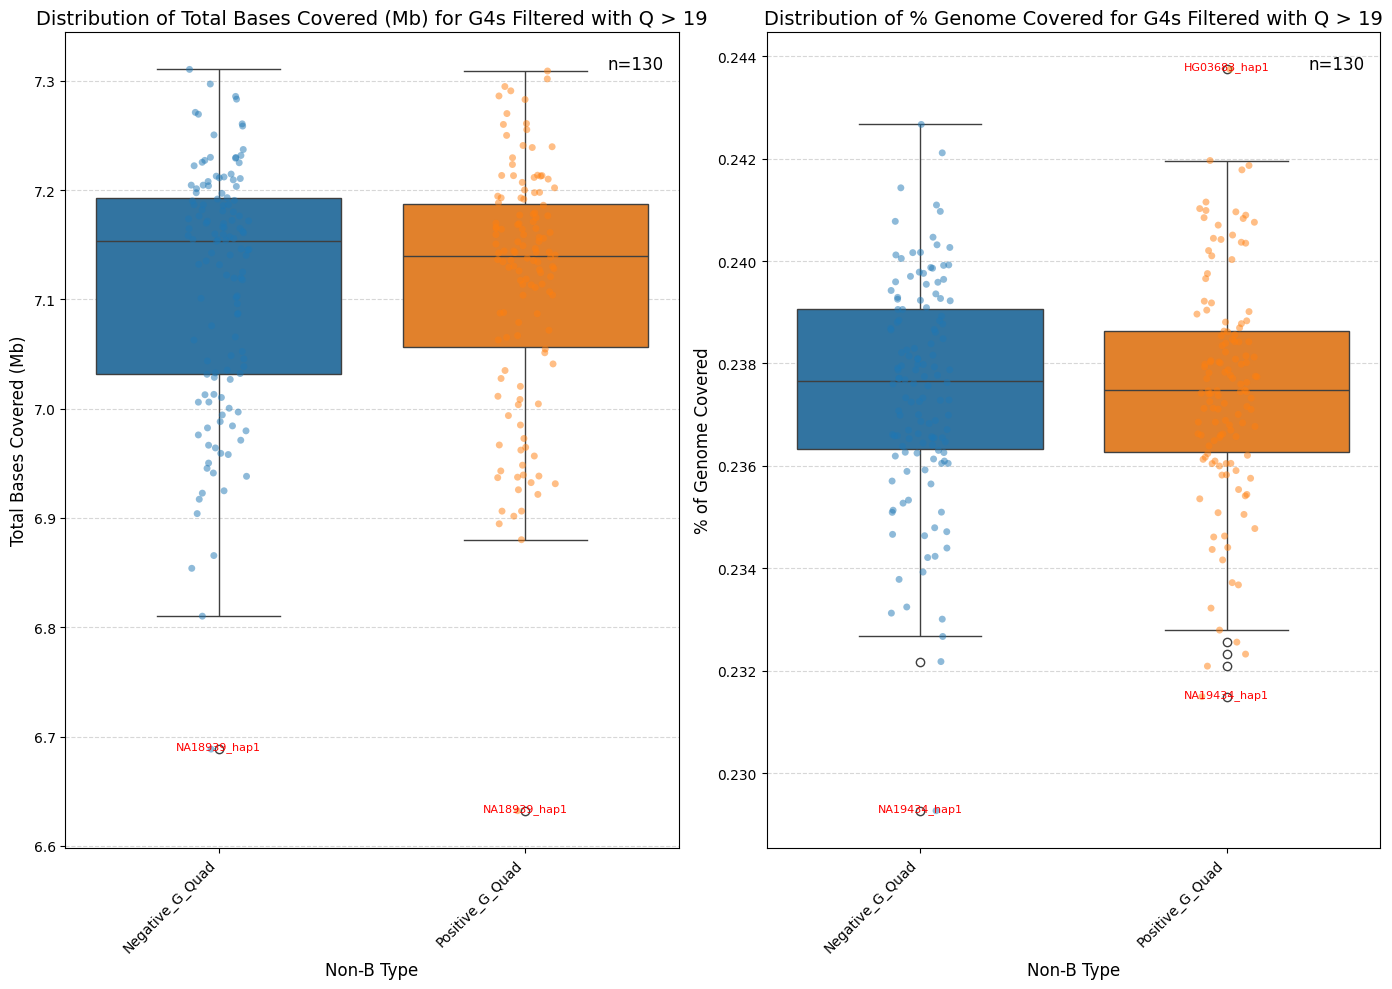

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load your feature counts dataframe for batch4
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
batch4[['Sample', 'Haplotype']] = batch4['Sample_Haplotype'].str.split('_', expand=True)

# Convert Total Bases Covered to megabases (Mb)
batch4['Total Bases Covered (Mb)'] = batch4['Total Bases Covered'] / 1_000_000

# Sort by 'Sample_Haplotype'
sorted_batch4 = batch4.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_batch4 = pd.merge(sorted_batch4, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Get unique number of sample_haplotypes
unique_sample_haplotypes = merged_batch4['Sample_Haplotype'].nunique()

# Plotting using seaborn
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed

# First subplot with distribution of total bases covered (Mb)
plt.subplot(1, 2, 1)
# Create a boxplot using seaborn
sns.boxplot(data=merged_batch4, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_batch4, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate outliers
for motif_type in merged_batch4['Motif Type'].unique():
    motif_data = merged_batch4[merged_batch4['Motif Type'] == motif_type]
    outliers = identify_outliers(motif_data['Total Bases Covered (Mb)'])
    for i in outliers.index:
        sample_haplotype = f"{merged_batch4.loc[i, 'Sample']}_{merged_batch4.loc[i, 'Haplotype']}"
        plt.text(x=list(merged_batch4['Motif Type'].unique()).index(motif_type), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_batch4['Motif Type'].nunique() - 0.55, y=merged_batch4['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# T-Test between pos and neg G-quadruplexes
pos_g4 = merged_batch4[merged_batch4['Motif Type'] == 'G4_Pos']['Total Bases Covered (Mb)']
neg_g4 = merged_batch4[merged_batch4['Motif Type'] == 'G4_Neg']['Total Bases Covered (Mb)']
t_stat, p_value = stats.ttest_ind(pos_g4, neg_g4)

# Annotate significance
if p_value < 0.05:
    plt.text(0.5, merged_batch4['Total Bases Covered (Mb)'].max() * 1.15, s=f"p={p_value:.3e}", fontsize=12, ha='center')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
plt.title('Distribution of Total Bases Covered (Mb) for G4s Filtered with Q > 19', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Second subplot with distribution of percent genome covered
plt.subplot(1, 2, 2)
# Create a boxplot using seaborn
sns.boxplot(data=merged_batch4, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', dodge=False, legend=False)
# Add jittered strip plot
sns.stripplot(data=merged_batch4, x='Motif Type', y='Percent of Genome', hue='Motif Type', palette='tab10', alpha=0.5, dodge=False, jitter=True, legend=False)

# Identify and annotate outliers
for motif_type in merged_batch4['Motif Type'].unique():
    motif_data = merged_batch4[merged_batch4['Motif Type'] == motif_type]
    outliers = identify_outliers(motif_data['Percent of Genome'])
    for i in outliers.index:
        sample_haplotype = f"{merged_batch4.loc[i, 'Sample']}_{merged_batch4.loc[i, 'Haplotype']}"
        plt.text(x=list(merged_batch4['Motif Type'].unique()).index(motif_type), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')

# Add total number of unique sample_haplotypes plotted to the top right
plt.text(x=merged_batch4['Motif Type'].nunique() - 0.55, y=merged_batch4['Percent of Genome'].max() * 1.0, s=f"n={unique_sample_haplotypes}", fontsize=12, ha='right')

# T-Test between pos and neg G-quadruplexes for Percent of Genome
pos_g4_percent = merged_batch4[merged_batch4['Motif Type'] == 'G4_Pos']['Percent of Genome']
neg_g4_percent = merged_batch4[merged_batch4['Motif Type'] == 'G4_Neg']['Percent of Genome']
t_stat_percent, p_value_percent = stats.ttest_ind(pos_g4_percent, neg_g4_percent)

# Annotate significance
if p_value_percent < 0.05:
    plt.text(0.5, merged_batch4['Percent of Genome'].max() * 1.0, s=f"p={p_value_percent:.3e}", fontsize=12, ha='center')

# Customize plot
plt.xlabel('Non-B Type', fontsize=12)
plt.ylabel('% of Genome Covered', fontsize=12)
plt.title('Distribution of % Genome Covered for G4s Filtered with Q > 19', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


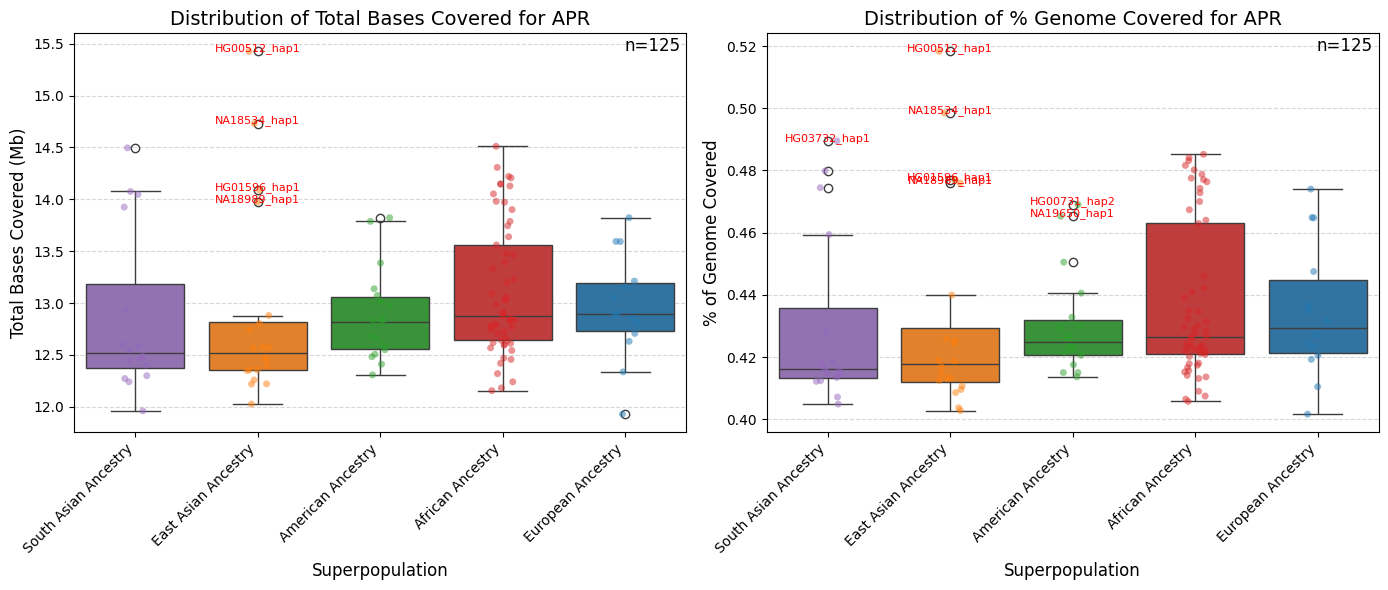

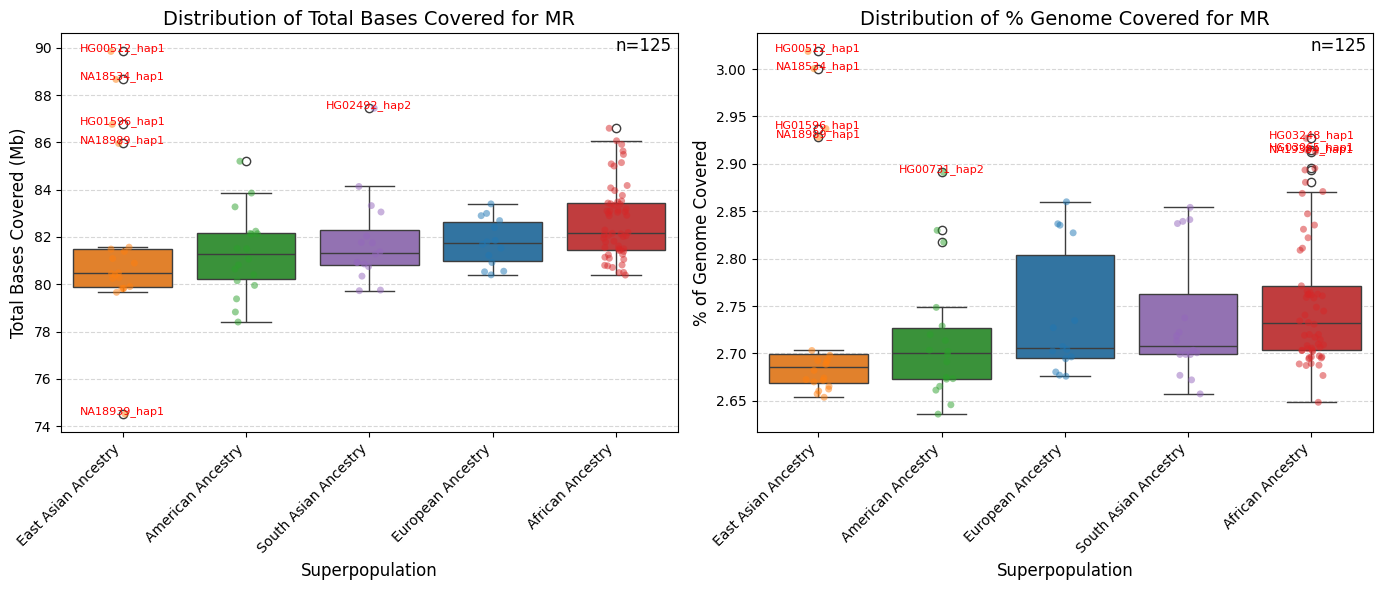

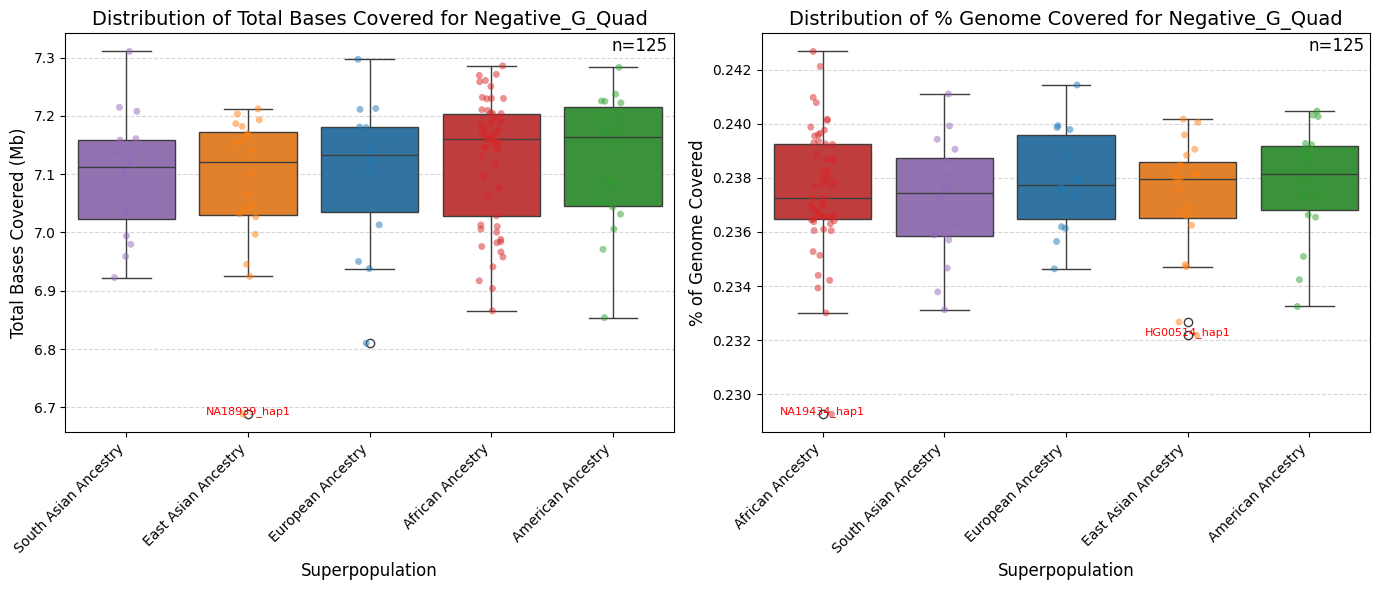

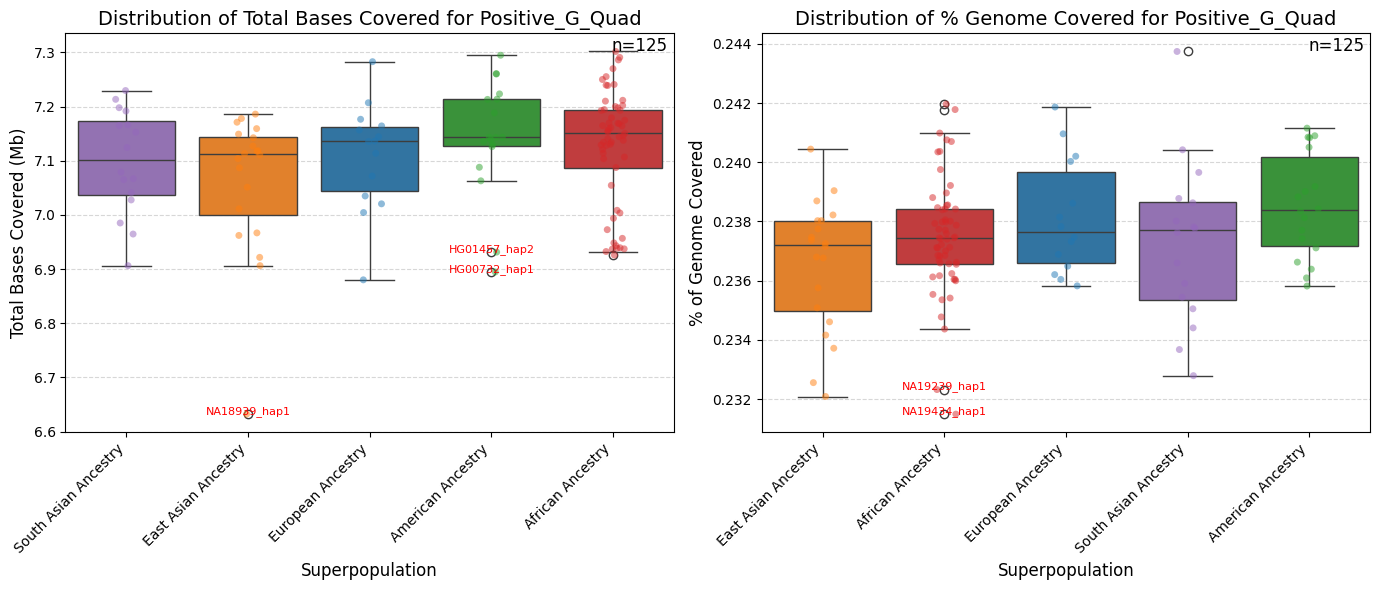

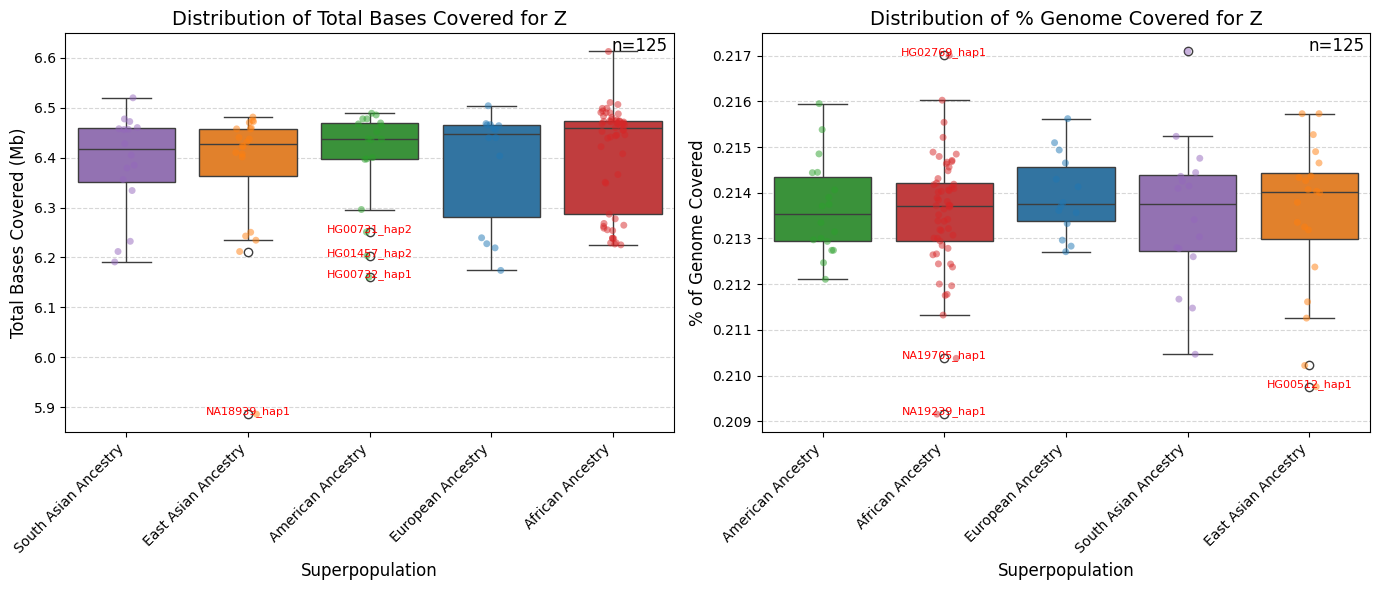

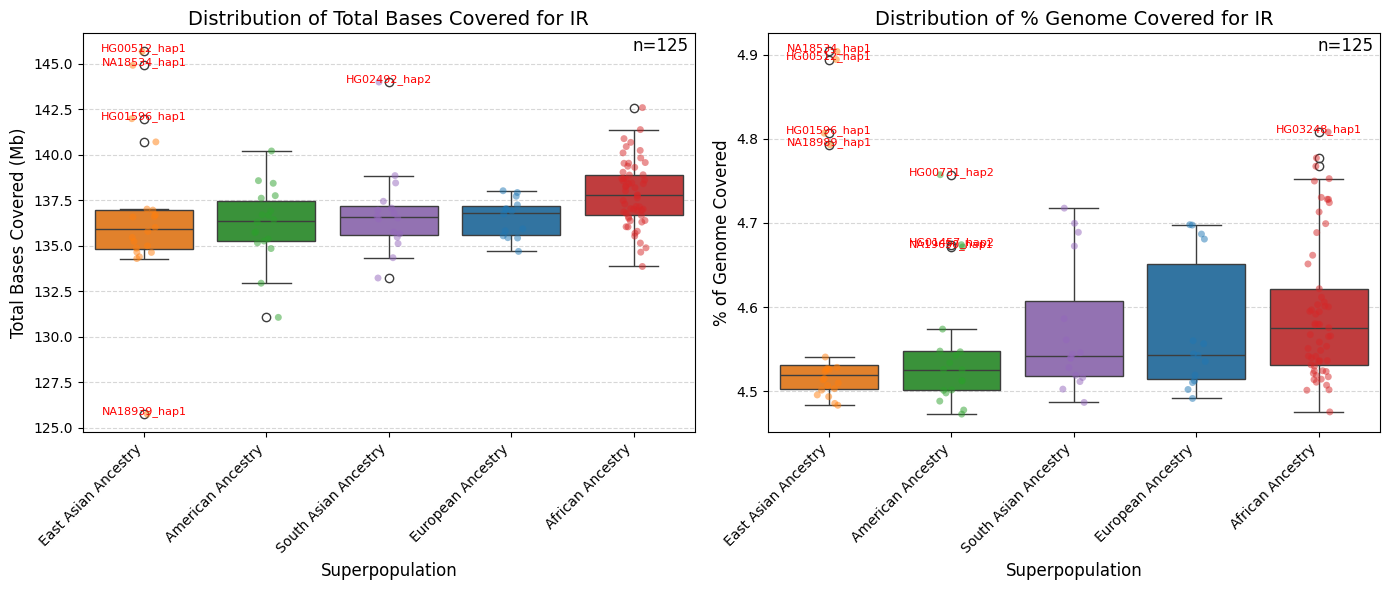

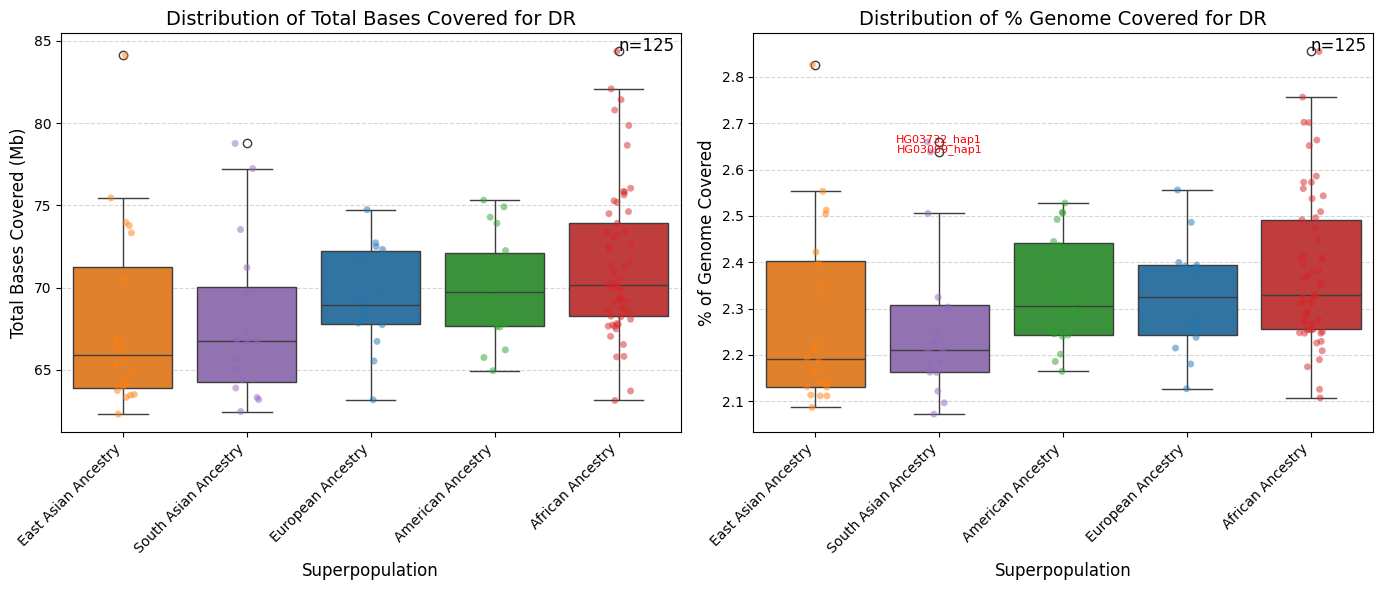

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define a color palette
superpopulations = merged_df['Superpopulation name'].unique()
palette = sns.color_palette("tab10", len(superpopulations))
color_dict = dict(zip(superpopulations, palette))

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    # Calculate medians for sorting
    medians_total_bases = motif_df.groupby('Superpopulation name')['Total Bases Covered (Mb)'].median().sort_values()
    medians_percent_genome = motif_df.groupby('Superpopulation name')['Percent of Genome'].median().sort_values()

    # Sort data by increasing median
    sorted_motif_df_total_bases = motif_df.set_index('Superpopulation name').loc[medians_total_bases.index].reset_index()
    sorted_motif_df_percent_genome = motif_df.set_index('Superpopulation name').loc[medians_percent_genome.index].reset_index()
    
    plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

    # First subplot with distribution of total bases covered in Megabases
    plt.subplot(1, 2, 1)
    # Create a boxplot using seaborn
    sns.boxplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_total_bases['Superpopulation name'].unique():
        pop_data = sorted_motif_df_total_bases[sorted_motif_df_total_bases['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Total Bases Covered (Mb)'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_total_bases.loc[i, 'Sample']}_{sorted_motif_df_total_bases.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_total_bases['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_total_bases['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_total_bases['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_total_bases['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Second subplot with distribution of percent genome covered
    plt.subplot(1, 2, 2)
    # Create a boxplot using seaborn
    sns.boxplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_percent_genome['Superpopulation name'].unique():
        pop_data = sorted_motif_df_percent_genome[sorted_motif_df_percent_genome['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Percent of Genome'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_percent_genome.loc[i, 'Sample']}_{sorted_motif_df_percent_genome.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_percent_genome['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_percent_genome['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_percent_genome['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_percent_genome['Percent of Genome'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('% of Genome Covered', fontsize=12)
    plt.title(f'Distribution of % Genome Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


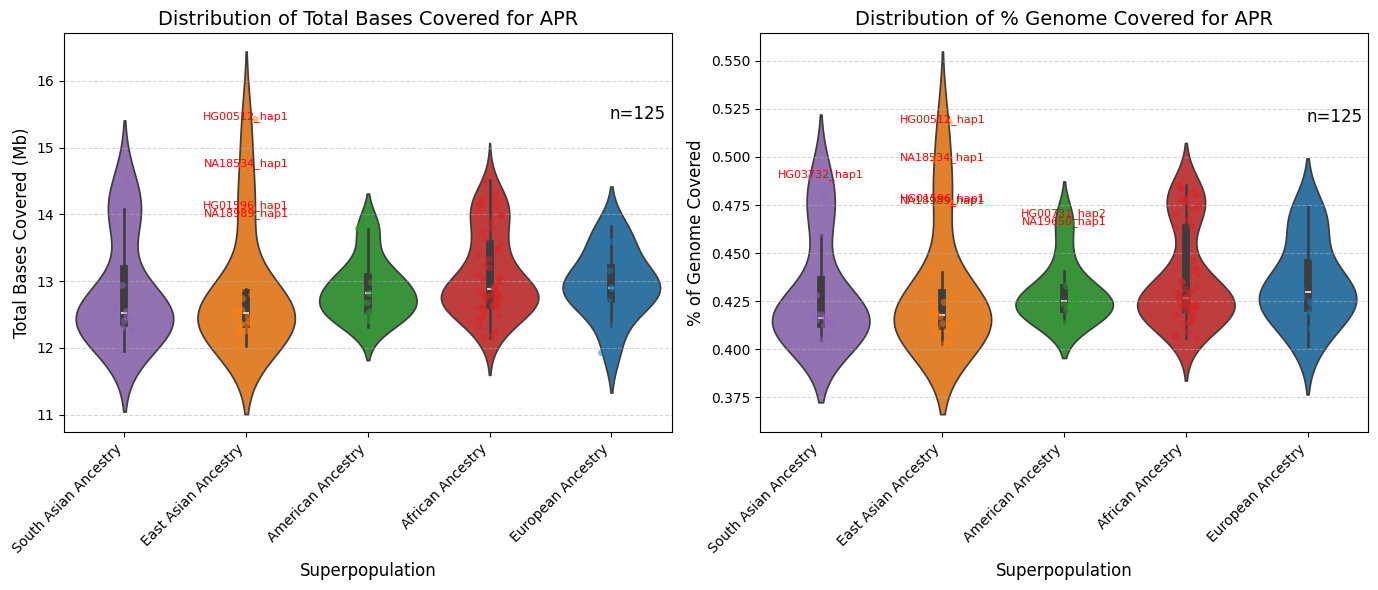

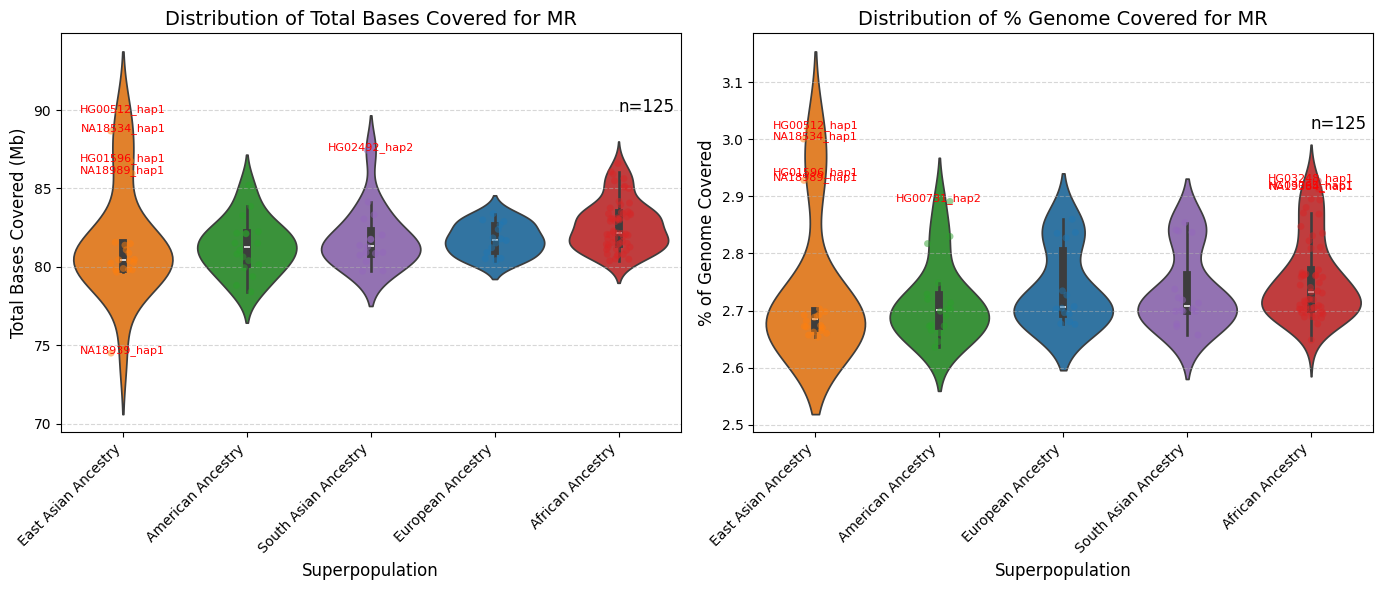

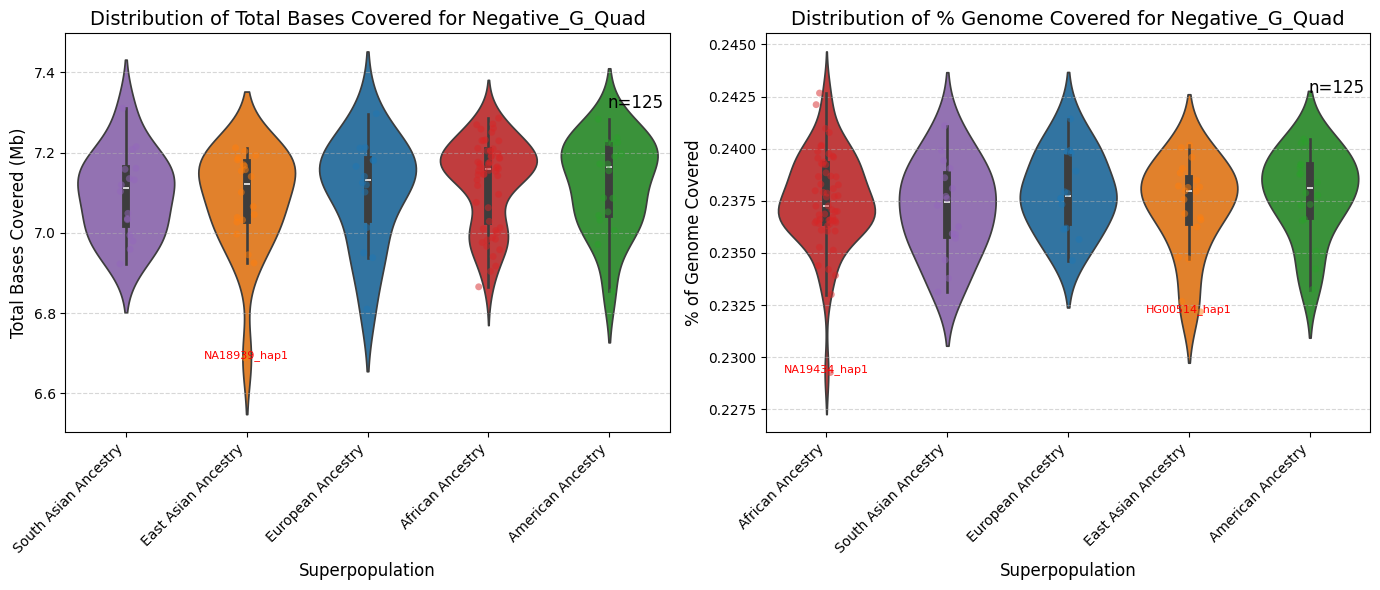

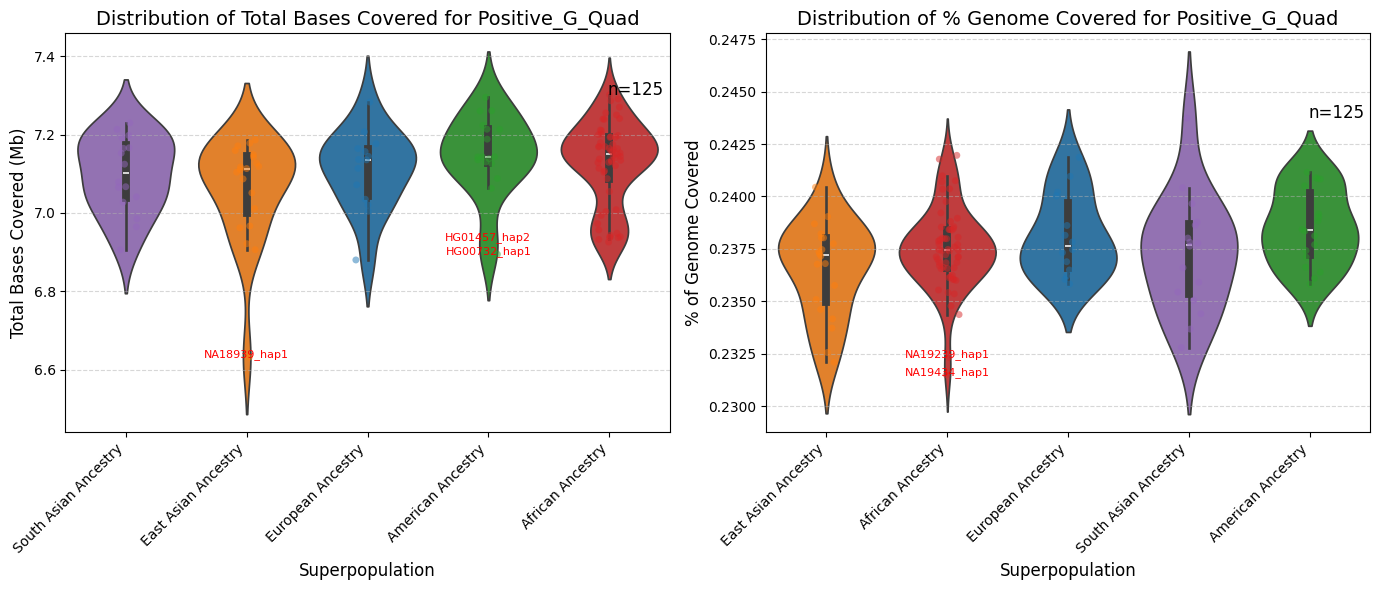

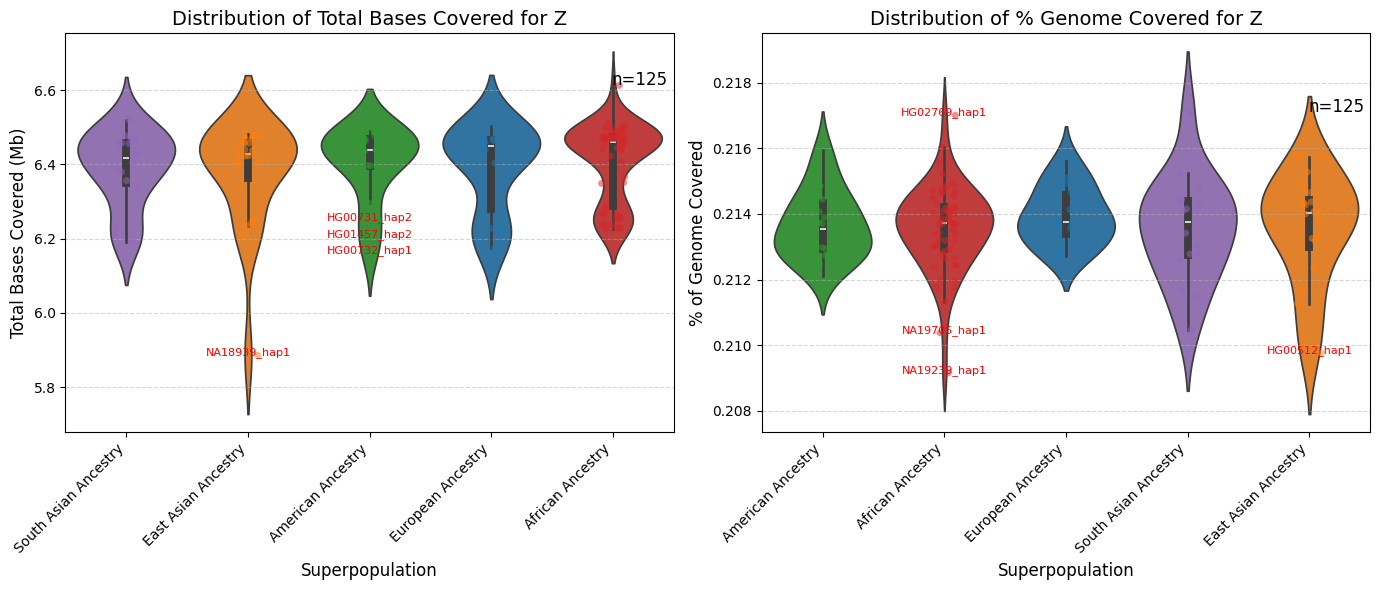

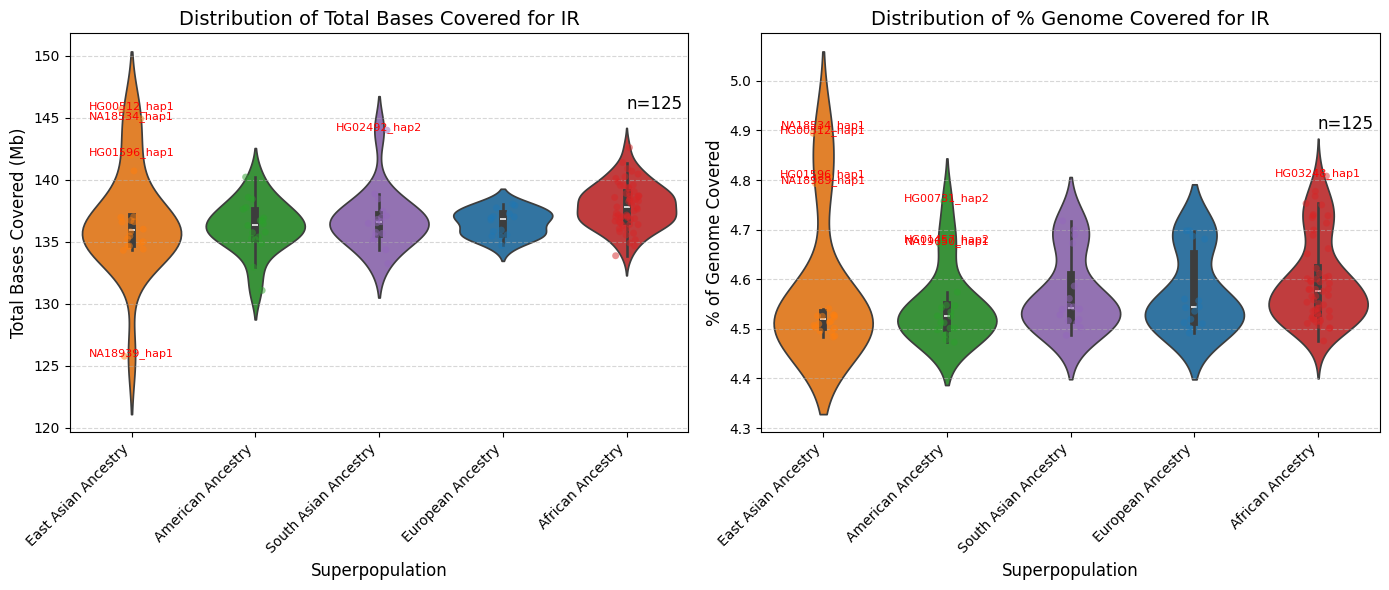

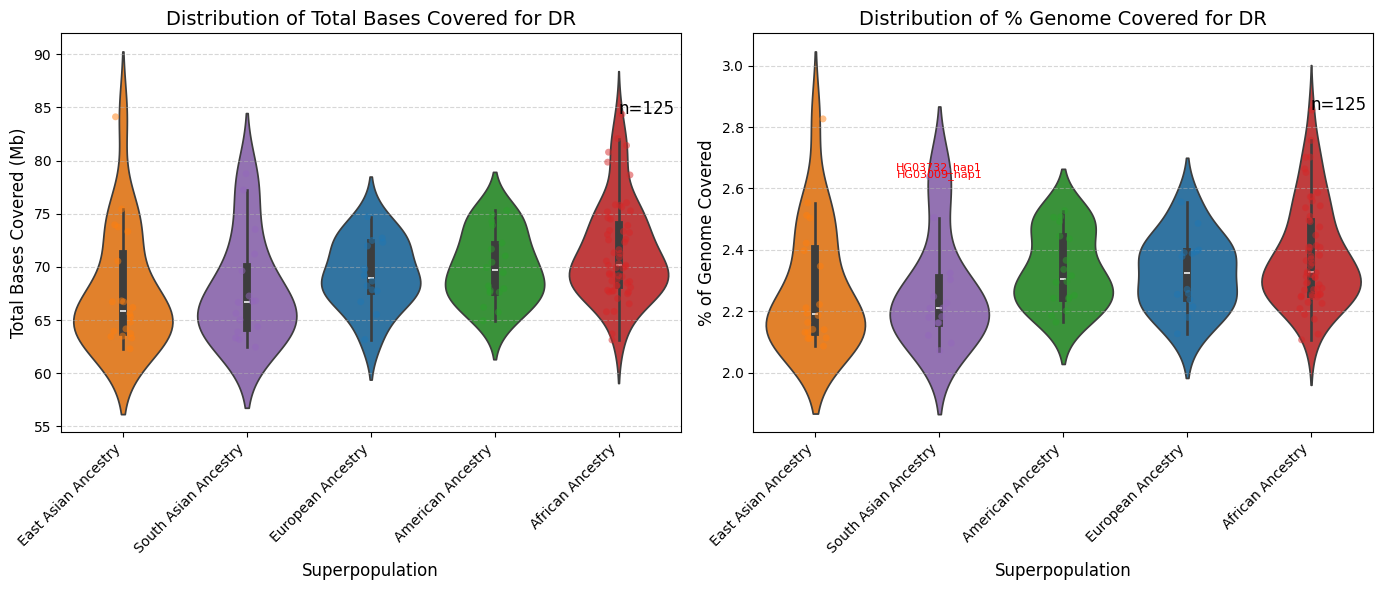

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature counts dataframes
batch1 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch1_chm13_collapsed_summary_metrics.csv')
batch2 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch2_chm13_collapsed_summary_metrics.csv')
batch3 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch3_chm13_collapsed_summary_metrics.csv')
batch4 = pd.read_csv('/home/alextu/scratch/results/summary_stats/verkko_batch123_chm13_collapsed_quadron_summary_metrics_combined.csv')

# Combine the dataframes
df = pd.concat([batch1, batch2, batch3, batch4], ignore_index=True)

# Extract sample identifier (e.g., HG#### or NA####) and haplotype from 'Sample_Haplotype' column
df[['Sample', 'Haplotype']] = df['Sample_Haplotype'].str.split('_', expand=True)

# Remove the specified sample_haplotype
df = df[df['Sample_Haplotype'] != 'NA20355_hap1']

# Sort by 'Sample_Haplotype'
sorted_df = df.sort_values(by='Sample_Haplotype')

# Assuming the metadata file is already read into metadata_df
metadata_df = pd.read_csv('/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv', delimiter='\t')

# Merge metadata with the sorted DataFrame on 'Sample' column
merged_df = pd.merge(sorted_df, metadata_df[['Sample name', 'Sex', 'Superpopulation name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Convert 'Total Bases Covered' to Megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1_000_000

# Function to identify outliers
def identify_outliers(data, multiplier=2):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define a color palette
superpopulations = merged_df['Superpopulation name'].unique()
palette = sns.color_palette("tab10", len(superpopulations))
color_dict = dict(zip(superpopulations, palette))

# Plotting using seaborn
motif_types = merged_df['Motif Type'].unique()

for motif in motif_types:
    motif_df = merged_df[merged_df['Motif Type'] == motif]
    
    # Calculate medians for sorting
    medians_total_bases = motif_df.groupby('Superpopulation name')['Total Bases Covered (Mb)'].median().sort_values()
    medians_percent_genome = motif_df.groupby('Superpopulation name')['Percent of Genome'].median().sort_values()

    # Sort data by increasing median
    sorted_motif_df_total_bases = motif_df.set_index('Superpopulation name').loc[medians_total_bases.index].reset_index()
    sorted_motif_df_percent_genome = motif_df.set_index('Superpopulation name').loc[medians_percent_genome.index].reset_index()
    
    plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

    # First subplot with distribution of total bases covered in Megabases
    plt.subplot(1, 2, 1)
    # Create a violin plot using seaborn
    sns.violinplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_total_bases, x='Superpopulation name', y='Total Bases Covered (Mb)', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_total_bases['Superpopulation name'].unique():
        pop_data = sorted_motif_df_total_bases[sorted_motif_df_total_bases['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Total Bases Covered (Mb)'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_total_bases.loc[i, 'Sample']}_{sorted_motif_df_total_bases.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_total_bases['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_total_bases['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_total_bases['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_total_bases['Total Bases Covered (Mb)'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('Total Bases Covered (Mb)', fontsize=12)
    plt.title(f'Distribution of Total Bases Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Second subplot with distribution of percent genome covered
    plt.subplot(1, 2, 2)
    # Create a violin plot using seaborn
    sns.violinplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, dodge=False)
    # Add jittered strip plot
    sns.stripplot(data=sorted_motif_df_percent_genome, x='Superpopulation name', y='Percent of Genome', hue='Superpopulation name', palette=color_dict, alpha=0.5, dodge=False, jitter=True, legend=False)
    
    # Identify and annotate outliers
    for pop in sorted_motif_df_percent_genome['Superpopulation name'].unique():
        pop_data = sorted_motif_df_percent_genome[sorted_motif_df_percent_genome['Superpopulation name'] == pop]
        outliers = identify_outliers(pop_data['Percent of Genome'])
        for i in outliers.index:
            sample_haplotype = f"{sorted_motif_df_percent_genome.loc[i, 'Sample']}_{sorted_motif_df_percent_genome.loc[i, 'Haplotype']}"
            plt.text(x=list(sorted_motif_df_percent_genome['Superpopulation name'].unique()).index(pop), y=outliers[i], s=sample_haplotype, color='red', fontsize=8, ha='center')
    
    # Add total number of unique sample_haplotypes plotted to the top right
    n_haplotypes = sorted_motif_df_percent_genome['Sample_Haplotype'].nunique()
    plt.text(x=sorted_motif_df_percent_genome['Superpopulation name'].nunique() - 0.55, y=sorted_motif_df_percent_genome['Percent of Genome'].max() * 1.0, s=f"n={n_haplotypes}", fontsize=12, ha='right')

    # Customize plot
    plt.xlabel('Superpopulation', fontsize=12)
    plt.ylabel('% of Genome Covered', fontsize=12)
    plt.title(f'Distribution of % Genome Covered for {motif}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend([],[], frameon=False)  # Remove legend from the subplot

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()
